In [3]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML, Image
from scipy.stats import ttest_ind_from_stats, spearmanr
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Safe Display Utilities
You **_MUST_** use these utilities to display dataframes in this notebook, then update `BLINDED` to `True` prior to pushing.

In [4]:
import inspect

def retrieve_name_in_fn(var):
    callers_local_vars = inspect.currentframe().f_back.f_back.f_locals.items()
    out = [var_name for var_name, var_val in callers_local_vars if var_val is var]
    assert len(out) == 1
    return out[0]

In [5]:
BLINDED = True # MUST ALWAYS BE "TRUE" IF PUSHED
def blind_display(*dfs):
    for df in dfs:
        print(f"{retrieve_name_in_fn(df)}.shape: ", df.shape)
        if BLINDED:
            display(df.head(0))
        else:
            display(df.head())

# Reading Output

In [6]:
LEVEL2 = '../data/all_hourly_data.h5'
X_level2 = pd.read_hdf(LEVEL2, 'vitals_labs')
X_mean_level2 = pd.read_hdf(LEVEL2, 'vitals_labs_mean')
Y_level2 = pd.read_hdf(LEVEL2, 'interventions')
S_level2 = pd.read_hdf(LEVEL2, 'patients')

In [7]:
blind_display(X_level2, X_mean_level2, Y_level2, S_level2)

print("Old (update if changing the pipeline):")
print("""
X_level2.shape: (2200954, 312)
X_mean_level2.shape: (2200954, 104)
Y_level2.shape: (2200954, 14)
S_level2.shape: (34472, 28)
""")

X_level2.shape:  (2200954, 312)


Empty DataFrame
Columns: [(alanine aminotransferase, count), (alanine aminotransferase, mean), (alanine aminotransferase, std), (albumin, count), (albumin, mean), (albumin, std), (albumin ascites, count), (albumin ascites, mean), (albumin ascites, std), (albumin pleural, count), (albumin pleural, mean), (albumin pleural, std), (albumin urine, count), (albumin urine, mean), (albumin urine, std), (alkaline phosphate, count), (alkaline phosphate, mean), (alkaline phosphate, std), (anion gap, count), (anion gap, mean), (anion gap, std), (asparate aminotransferase, count), (asparate aminotransferase, mean), (asparate aminotransferase, std), (basophils, count), (basophils, mean), (basophils, std), (bicarbonate, count), (bicarbonate, mean), (bicarbonate, std), (bilirubin, count), (bilirubin, mean), (bilirubin, std), (blood urea nitrogen, count), (blood urea nitrogen, mean), (blood urea nitrogen, std), (co2, count), (co2, mean), (co2, std), (co2 (etco2, pco2, etc.), count), (co2 (etco2, pco2, etc.), mean), (co2 (etco2, pco2, etc.), std), (calcium, count), (calcium, mean), (calcium, std), (calcium ionized, count), (calcium ionized, mean), (calcium ionized, std), (calcium urine, count), (calcium urine, mean), (calcium urine, std), (cardiac index, count), (cardiac index, mean), (cardiac index, std), (cardiac output thermodilution, count), (cardiac output thermodilution, mean), (cardiac output thermodilution, std), (cardiac output fick, count), (cardiac output fick, mean), (cardiac output fick, std), (central venous pressure, count), (central venous pressure, mean), (central venous pressure, std), (chloride, count), (chloride, mean), (chloride, std), (chloride urine, count), (chloride urine, mean), (chloride urine, std), (cholesterol, count), (cholesterol, mean), (cholesterol, std), (cholesterol hdl, count), (cholesterol hdl, mean), (cholesterol hdl, std), (cholesterol ldl, count), (cholesterol ldl, mean), (cholesterol ldl, std), (creatinine, count), (creatinine, mean), (creatinine, std), (creatinine ascites, count), (creatinine ascites, mean), (creatinine ascites, std), (creatinine body fluid, count), (creatinine body fluid, mean), (creatinine body fluid, std), (creatinine pleural, count), (creatinine pleural, mean), (creatinine pleural, std), (creatinine urine, count), (creatinine urine, mean), (creatinine urine, std), (diastolic blood pressure, count), (diastolic blood pressure, mean), (diastolic blood pressure, std), (eosinophils, count), (eosinophils, mean), (eosinophils, std), (fibrinogen, count), ...]
Index: []

[0 rows x 312 columns]

X_mean_level2.shape:  (2200954, 104)


,,,LEVEL2,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine,ph,ph urine
,,,Aggregation Function,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
subject_id,hadm_id,icustay_id,hours_in,,,,,,,,,,,,,,,,,,,,,


Y_level2.shape:  (2200954, 14)


,,,,vent,vaso,adenosine,dobutamine,dopamine,epinephrine,isuprel,milrinone,norepinephrine,phenylephrine,vasopressin,colloid_bolus,crystalloid_bolus,nivdurations
subject_id,hadm_id,icustay_id,hours_in,,,,,,,,,,,,,,


S_level2.shape:  (34472, 28)


,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,intime,outtime,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,


Old (update if changing the pipeline):

X_level2.shape: (2200954, 312)
X_mean_level2.shape: (2200954, 104)
Y_level2.shape: (2200954, 14)
S_level2.shape: (34472, 28)



In [9]:
ITEMID = '../data/all_hourly_data.h5'
X_itemid = pd.read_hdf(ITEMID, 'vitals_labs')
X_mean_itemid = pd.read_hdf(ITEMID, 'vitals_labs_mean')

In [10]:
blind_display(X_itemid, X_mean_itemid)

X_itemid.shape:  (2200954, 312)


Empty DataFrame
Columns: [(alanine aminotransferase, count), (alanine aminotransferase, mean), (alanine aminotransferase, std), (albumin, count), (albumin, mean), (albumin, std), (albumin ascites, count), (albumin ascites, mean), (albumin ascites, std), (albumin pleural, count), (albumin pleural, mean), (albumin pleural, std), (albumin urine, count), (albumin urine, mean), (albumin urine, std), (alkaline phosphate, count), (alkaline phosphate, mean), (alkaline phosphate, std), (anion gap, count), (anion gap, mean), (anion gap, std), (asparate aminotransferase, count), (asparate aminotransferase, mean), (asparate aminotransferase, std), (basophils, count), (basophils, mean), (basophils, std), (bicarbonate, count), (bicarbonate, mean), (bicarbonate, std), (bilirubin, count), (bilirubin, mean), (bilirubin, std), (blood urea nitrogen, count), (blood urea nitrogen, mean), (blood urea nitrogen, std), (co2, count), (co2, mean), (co2, std), (co2 (etco2, pco2, etc.), count), (co2 (etco2, pco2, etc.), mean), (co2 (etco2, pco2, etc.), std), (calcium, count), (calcium, mean), (calcium, std), (calcium ionized, count), (calcium ionized, mean), (calcium ionized, std), (calcium urine, count), (calcium urine, mean), (calcium urine, std), (cardiac index, count), (cardiac index, mean), (cardiac index, std), (cardiac output thermodilution, count), (cardiac output thermodilution, mean), (cardiac output thermodilution, std), (cardiac output fick, count), (cardiac output fick, mean), (cardiac output fick, std), (central venous pressure, count), (central venous pressure, mean), (central venous pressure, std), (chloride, count), (chloride, mean), (chloride, std), (chloride urine, count), (chloride urine, mean), (chloride urine, std), (cholesterol, count), (cholesterol, mean), (cholesterol, std), (cholesterol hdl, count), (cholesterol hdl, mean), (cholesterol hdl, std), (cholesterol ldl, count), (cholesterol ldl, mean), (cholesterol ldl, std), (creatinine, count), (creatinine, mean), (creatinine, std), (creatinine ascites, count), (creatinine ascites, mean), (creatinine ascites, std), (creatinine body fluid, count), (creatinine body fluid, mean), (creatinine body fluid, std), (creatinine pleural, count), (creatinine pleural, mean), (creatinine pleural, std), (creatinine urine, count), (creatinine urine, mean), (creatinine urine, std), (diastolic blood pressure, count), (diastolic blood pressure, mean), (diastolic blood pressure, std), (eosinophils, count), (eosinophils, mean), (eosinophils, std), (fibrinogen, count), ...]
Index: []

[0 rows x 312 columns]

X_mean_itemid.shape:  (2200954, 104)


,,,LEVEL2,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine,ph,ph urine
,,,Aggregation Function,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
subject_id,hadm_id,icustay_id,hours_in,,,,,,,,,,,,,,,,,,,,,


# Demographics

In [11]:
def categorize_age(age):
    if age > 10 and age <= 30: 
        cat = '<31'
    elif age > 30 and age <= 50:
        cat = '31-50'
    elif age > 50 and age <= 70:
        cat = '51-70'
    else: 
        cat = '>70'
    return cat
def categorize_ethnicity(ethnicity):
    if 'ASIAN' in ethnicity:
        ethnicity = 'ASIAN'
    elif 'WHITE' in ethnicity:
        ethnicity = 'WHITE'
    elif 'HISPANIC' in ethnicity:
        ethnicity = 'HISPANIC/LATINO'
    elif 'BLACK' in ethnicity:
        ethnicity = 'BLACK'
#    elif 'AMERICAN INDIAN' in ethnicity:
#        ethnicity = 'AMERICAN INDIAN'
    else: 
        ethnicity = 'OTHER'
    return ethnicity

In [12]:
S_level2['age_bucket'] = S_level2['age'].apply(categorize_age)
S_level2['ethnicity'] = S_level2['ethnicity'].apply(categorize_ethnicity)

blind_display(S_level2)

S_level2.shape:  (34472, 29)


,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,outtime,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,age_bucket
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,


In [14]:
S_level2.columns

Index(['gender', 'ethnicity', 'age', 'insurance', 'admittime',
       'diagnosis_at_admission', 'dischtime', 'discharge_location',
       'fullcode_first', 'dnr_first', 'fullcode', 'dnr', 'dnr_first_charttime',
       'timecmo_chart', 'cmo_first', 'cmo_last', 'cmo', 'deathtime', 'intime',
       'outtime', 'los_icu', 'admission_type', 'first_careunit', 'mort_icu',
       'mort_hosp', 'hospital_expire_flag', 'hospstay_seq', 'readmission_30',
       'age_bucket'],
      dtype='object')

In [17]:
by_ethnicity = S_level2.reset_index().pivot_table(index='ethnicity',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean'},
                                                  margins=True)
by_ethnicity = by_ethnicity.sort_values(by=('icustay_id','All'))
by_ethnicity = pd.concat([by_ethnicity], keys=['ethnicity'], names=['item'])

by_insurance = S_level2.reset_index().pivot_table(index='insurance',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean'},
                                                  margins=True)
by_insurance = by_insurance.sort_values(by=('icustay_id','All'))
by_insurance = pd.concat([by_insurance], keys=['insurance'], names=['item'])

by_age = S_level2.reset_index().pivot_table(index='age_bucket',
                                            columns='gender',
                                            values=['icustay_id','mort_icu','mort_hosp'],
                                            aggfunc={'icustay_id': 'count',
                                                     'mort_icu': 'mean',
                                                     'mort_hosp':'mean'},
                                            margins=True)
by_age = by_age.sort_values(by=('icustay_id','All'))
by_age = pd.concat([by_age], keys=['age'], names=['item'])

by_admission = S_level2.reset_index().pivot_table(index='admission_type',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean'},
                                                  margins=True)
by_admission = by_admission.sort_values(by=('icustay_id','All'))
by_admission = pd.concat([by_admission], keys=['admission_type'], names=['item'])

by_unit = S_level2.reset_index().pivot_table(index='first_careunit',
                                              columns='gender',
                                              values=['icustay_id','mort_icu','mort_hosp'],
                                              aggfunc={'icustay_id': 'count',
                                                       'mort_icu': 'mean',
                                                       'mort_hosp':'mean'},
                                              margins=True)
by_unit = by_unit.sort_values(by=('icustay_id','All'))
by_unit = pd.concat([by_unit], keys=['first_careunit'], names=['item'])

In [18]:
demographics = pd.concat([by_ethnicity, by_age, by_insurance, by_admission, by_unit],axis=0)
demographics.index.names = ['item','values']
demographics

icustay_id               mort_hosp            \
gender                                  F      M    All         F         M   
item           values                                                         
ethnicity      ASIAN                  370    472    842  0.100000  0.095339   
               HISPANIC/LATINO        448    689   1137  0.064732  0.059507   
               BLACK                 1448   1219   2667  0.069061  0.067268   
               OTHER                 2061   3122   5183  0.159631  0.118193   
               WHITE                10651  13992  24643  0.102526  0.084334   
               All                  14978  19494  34472  0.105955  0.088078   
age            <31                    748   1084   1832  0.025401  0.042435   
               31-50                 2212   3277   5489  0.057414  0.052487   
               51-70                 4888   8050  12938  0.082242  0.072547   
               >70                   7130   7083  14213  0.145722  0.129183   
               All                  14978  19494  34472  0.105955  0.088078   
insurance      Self Pay               125    352    477  0.144000  0.107955   
               Government             402    648   1050  0.032338  0.055556   
               Medicaid              1186   1596   2782  0.075042  0.077694   
               Private               4415   7431  11846  0.069083  0.060153   
               Medicare              8850   9467  18317  0.131299  0.113235   
               All                  14978  19494  34472  0.105955  0.088078   
admission_type URGENT                 409    528    937  0.117359  0.100379   
               ELECTIVE              2282   3423   5705  0.017528  0.019866   
               EMERGENCY            12287  15543  27830  0.121999  0.102683   
               All                  14978  19494  34472  0.105955  0.088078   
first_careunit TSICU                 1777   2725   4502  0.104671  0.086606   
               CCU                   2185   3008   5193  0.108467  0.082447   
               SICU                  2678   2842   5520  0.116878  0.112597   
               CSRU                  2326   4724   7050  0.035684  0.021169   
               MICU                  6012   6195  12207  0.127745  0.131235   
               All                  14978  19494  34472  0.105955  0.088078   

                                          mort_icu                      
gender                               All         F         M       All  
item           values                                                   
ethnicity      ASIAN            0.097387  0.070270  0.063559  0.066508  
               HISPANIC/LATINO  0.061566  0.046875  0.043541  0.044855  
               BLACK            0.068241  0.048343  0.045939  0.047244  
               OTHER            0.134671  0.117904  0.086803  0.099170  
               WHITE            0.092197  0.068820  0.055818  0.061437  
               All              0.095846  0.072974  0.059916  0.065589  
age            <31              0.035480  0.028075  0.038745  0.034389  
               31-50            0.054473  0.041139  0.039670  0.040262  
               51-70            0.076210  0.057488  0.051304  0.053640  
               >70              0.137480  0.098177  0.082310  0.090269  
               All              0.095846  0.072974  0.059916  0.065589  
insurance      Self Pay         0.117400  0.120000  0.093750  0.100629  
               Government       0.046667  0.024876  0.037037  0.032381  
               Medicaid         0.076564  0.058179  0.054511  0.056075  
               Private          0.063481  0.049830  0.044543  0.046514  
               Medicare         0.121963  0.088023  0.073202  0.080363  
               All              0.095846  0.072974  0.059916  0.065589  
admission_type URGENT           0.107791  0.088020  0.070076  0.077908  
               ELECTIVE         0.018931  0.010517  0.013439  0.012270  
               EMERGENCY        0.111211  0.084073  0.

In [19]:
S_level2.isnull().sum()

gender                        0
ethnicity                     0
age                           0
insurance                     0
admittime                     0
diagnosis_at_admission        1
dischtime                     0
discharge_location            0
fullcode_first             6310
dnr_first                  6310
fullcode                   6310
dnr                        6310
dnr_first_charttime       31353
timecmo_chart             33514
cmo_first                  6310
cmo_last                   6310
cmo                        6310
deathtime                 31122
intime                        0
outtime                       0
los_icu                       0
admission_type                0
first_careunit                0
mort_icu                      0
mort_hosp                     0
hospital_expire_flag          0
hospstay_seq                  0
readmission_30                0
age_bucket                    0
dtype: int64

## Histogram - age

Text(0, 0.5, 'count')

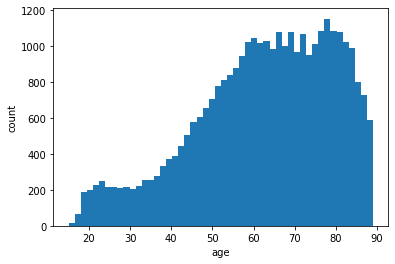

In [20]:
age = S_level2['age']
age = age[age<300]
plt.hist(age, bins=50)
plt.xlabel('age')
plt.ylabel('count')

## Histogram - los

Text(0, 0.5, 'count')

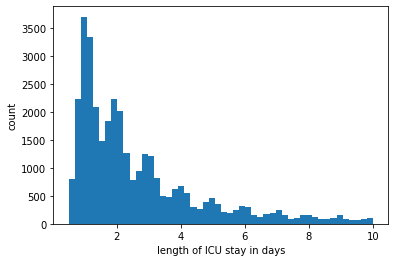

In [21]:
los = S_level2['los_icu']
plt.hist(los, bins=50)
plt.xlabel('length of ICU stay in days')
plt.ylabel('count')

# Vitals and Labs
#### `level2` stats

In [22]:
vitals_mean = pd.DataFrame(X_mean_level2.mean(),columns=['mean'])
vitals_std = pd.DataFrame(X_mean_level2.std(),columns=['stdev'])
vitals_missing = pd.DataFrame(X_mean_level2.isnull().sum()/X_mean_level2.shape[0]*100,columns=['missing percent'])

vitals_summary = pd.concat([vitals_mean,vitals_std,vitals_missing],axis=1)
vitals_summary.index = vitals_summary.index.droplevel(1)
vitals_summary.sort_values(by='missing percent', ascending=True,inplace=True)
vitals_summary

,mean,stdev,missing percent
LEVEL2,,,
heart rate,84.974313,17.271791,10.413939
respiratory rate,19.093328,5.722042,11.835777
systolic blood pressure,121.828655,21.994139,13.258342
diastolic blood pressure,60.891112,14.128354,13.279696
mean blood pressure,79.371499,15.486783,13.712145
...,...,...,...
albumin ascites,1.707018,0.809755,99.994820
creatinine ascites,3.471094,7.165170,99.997092
lymphocytes atypical csl,2.678571,4.450023,99.998092


In [23]:
vitals_summary.to_csv('../resources/level2_stat.csv')

#### `itemid` Stats

In [29]:
vitals_mean_itemid = pd.DataFrame(X_mean_itemid.mean(),columns=['mean'])
vitals_std_itemid = pd.DataFrame(X_mean_itemid.std(),columns=['stdev'])
vitals_missing_itemid = pd.DataFrame(X_mean_itemid.isna().sum()/X_mean_level2.shape[0]*100,columns=['missing percent'])

vitals_summary_itemid = pd.concat([vitals_mean_itemid,vitals_std_itemid,vitals_missing_itemid],axis=1)
vitals_summary_itemid.index = vitals_summary_itemid.index.droplevel(1)
vitals_summary_itemid.sort_values(by='missing percent',ascending=True,inplace=True)
vitals_summary_itemid

,mean,stdev,missing percent
LEVEL2,,,
heart rate,84.974313,17.271791,10.413939
respiratory rate,19.093328,5.722042,11.835777
systolic blood pressure,121.828655,21.994139,13.258342
diastolic blood pressure,60.891112,14.128354,13.279696
mean blood pressure,79.371499,15.486783,13.712145
...,...,...,...
albumin ascites,1.707018,0.809755,99.994820
creatinine ascites,3.471094,7.165170,99.997092
lymphocytes atypical csl,2.678571,4.450023,99.998092


In [30]:
vitals_summary_itemid.to_csv('../resources/item_id_stat.csv')

## Interventions

In [31]:
mean_duration = pd.DataFrame(Y_level2.reset_index().groupby('icustay_id').agg(sum).mean()[3:],columns=['hours'])

In [32]:
# average duration of each intervention given for one icu stay 
# (colloid bolus, crystalloid bolus - number of times given)
mean_duration

,hours
vent,12.197087
vaso,8.099124
adenosine,0.001508
dobutamine,0.356782
dopamine,0.948364
epinephrine,0.598399
isuprel,0.005483
milrinone,0.871838
norepinephrine,2.720933
phenylephrine,4.055697
